In [1]:
import os
import pandas as pd
import json
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

In [2]:
def CustomParser(data):
    j1 = json.loads(data)
    return j1

In [3]:
# set path
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse_2'
#path_root = '/home/yassinebha/Drive/QC_zooniverse_2'
path_root = '/media/yassine/data_disk/Drive/QC_zooniverse_2'

In [4]:
# Read raw table
classifications = pd.read_csv(os.path.join(path_root,'Beta1/spot-anatomical-differences-classifications.csv'), converters={'metadata':CustomParser,'annotations':CustomParser,'subject_data':CustomParser},header=0)

In [5]:
classifications.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,18831859,not-logged-in-6fe4fc3cb4085d05b58e,NaN,6fe4fc3cb4085d05b58e,2335,Spot anatomical differences,12.13,2016-10-13 22:27:18 UTC,NaN,NaN,"{'finished_at': '2016-10-13T22:27:19.459Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865440': {'retired': {'id': 2556813, 'class...",3865440
1,18831868,not-logged-in-6fe4fc3cb4085d05b58e,NaN,6fe4fc3cb4085d05b58e,2335,Spot anatomical differences,12.13,2016-10-13 22:27:23 UTC,NaN,NaN,"{'finished_at': '2016-10-13T22:27:24.068Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865514': {'retired': {'id': 2556814, 'class...",3865514
2,18831887,not-logged-in-6fe4fc3cb4085d05b58e,NaN,6fe4fc3cb4085d05b58e,2335,Spot anatomical differences,12.13,2016-10-13 22:27:31 UTC,NaN,NaN,"{'finished_at': '2016-10-13T22:27:32.504Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865445': {'retired': {'id': 2556815, 'class...",3865445
3,18847132,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:18:52 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:18:52.065Z', 'u...","[{'value': 'Fail', 'task': 'T0', 'task_label':...","{'3865525': {'retired': {'id': 2557556, 'class...",3865525
4,18847141,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:19:06 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:19:06.742Z', 'u...","[{'value': 'Maybe', 'task': 'T0', 'task_label'...","{'3865464': {'retired': {'id': 2557557, 'class...",3865464


In [6]:
# original count
classifications.count()

classification_id    1644
user_name            1644
user_id              1024
user_ip              1644
workflow_id          1644
workflow_name        1644
workflow_version     1644
created_at           1644
gold_standard           0
expert                  0
metadata             1644
annotations          1644
subject_data         1644
subject_ids          1644
dtype: int64

In [7]:
# remove not logged in raters
#classifications = classifications[classifications.user_name.str.find("not-logged-in")==-1]
#classifications.count()

In [8]:
# extract tagging count
classifications.loc[:,"n_tagging"] = [ len(q[0]['value']) for q in classifications.annotations]
# extract rating count
classifications.loc[:,"rating"] = [ q[0]['value'] for q in classifications.annotations]
# extract subjects id
classifications.loc[:,"ID"] = [ row.subject_data[str(classifications.subject_ids[ind])]['subject_ID'] for ind,row in classifications.iterrows()]
# extract files name
classifications.loc[:,"imgnm"] = [ row.subject_data[str(classifications.subject_ids[ind])]['images'] for ind,row in classifications.iterrows()]

In [9]:
classifications.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,n_tagging,rating,ID,imgnm
0,18831859,not-logged-in-6fe4fc3cb4085d05b58e,NaN,6fe4fc3cb4085d05b58e,2335,Spot anatomical differences,12.13,2016-10-13 22:27:18 UTC,NaN,NaN,"{'finished_at': '2016-10-13T22:27:19.459Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865440': {'retired': {'id': 2556813, 'class...",3865440,2,OK,X2961243,summary_X2961243_anat2template.gif
1,18831868,not-logged-in-6fe4fc3cb4085d05b58e,NaN,6fe4fc3cb4085d05b58e,2335,Spot anatomical differences,12.13,2016-10-13 22:27:23 UTC,NaN,NaN,"{'finished_at': '2016-10-13T22:27:24.068Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865514': {'retired': {'id': 2556814, 'class...",3865514,2,OK,X2136051,summary_X2136051_anat2template.gif
2,18831887,not-logged-in-6fe4fc3cb4085d05b58e,NaN,6fe4fc3cb4085d05b58e,2335,Spot anatomical differences,12.13,2016-10-13 22:27:31 UTC,NaN,NaN,"{'finished_at': '2016-10-13T22:27:32.504Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865445': {'retired': {'id': 2556815, 'class...",3865445,2,OK,X0010061,summary_X0010061_anat2template.gif
3,18847132,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:18:52 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:18:52.065Z', 'u...","[{'value': 'Fail', 'task': 'T0', 'task_label':...","{'3865525': {'retired': {'id': 2557556, 'class...",3865525,4,Fail,X6206397,summary_X6206397_anat2template.gif
4,18847141,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:19:06 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:19:06.742Z', 'u...","[{'value': 'Maybe', 'task': 'T0', 'task_label'...","{'3865464': {'retired': {'id': 2557557, 'class...",3865464,5,Maybe,X2054998,summary_X2054998_anat2template.gif


In [10]:
# How many rating per user
user_count = classifications.user_name.value_counts()
user_count

not-logged-in-6de6af62194409404f22    101
not-logged-in-3382ba2594cbaa5d6693     76
EcceruElme                             58
KazzaY                                 46
Dennis21                               41
asko_oksa                              30
not-logged-in-afc55459e27e2403b971     28
Liisika                                23
simexp                                 22
cyerby                                 21
WEBs_in_space                          19
Chris5420                              19
CDawgUnleashed                         19
Kroth                                  17
MishySee                               17
not-logged-in-1e0d1c0905a26959269a     16
jschott5                               16
nhaberman                              16
Lostasagoose                           16
Yassinebha                             15
not-logged-in-37f20e4d7a0fd180f54c     15
ReggieMcintosh                         14
not-logged-in-105a3f2de29ff2403d69     13
not-logged-in-2d441818989504872ded

In [11]:
#select only users that have rated a certain ammount of images 
list_user = user_count.index
list_user = list_user[user_count.values>20]
user_count[list_user]

not-logged-in-6de6af62194409404f22    101
not-logged-in-3382ba2594cbaa5d6693     76
EcceruElme                             58
KazzaY                                 46
Dennis21                               41
asko_oksa                              30
not-logged-in-afc55459e27e2403b971     28
Liisika                                23
simexp                                 22
cyerby                                 21
Name: user_name, dtype: int64

In [12]:
list_user.drop('simexp')

Index(['not-logged-in-6de6af62194409404f22',
       'not-logged-in-3382ba2594cbaa5d6693', 'EcceruElme', 'KazzaY',
       'Dennis21', 'asko_oksa', 'not-logged-in-afc55459e27e2403b971',
       'Liisika', 'cyerby'],
      dtype='object')

In [13]:
# remove users with less rating then the selected threshold
classifications = classifications[classifications.user_name.isin(list_user)]
classifications.count()

classification_id    446
user_name            446
user_id              241
user_ip              446
workflow_id          446
workflow_name        446
workflow_version     446
created_at           446
gold_standard          0
expert                 0
metadata             446
annotations          446
subject_data         446
subject_ids          446
n_tagging            446
rating               446
ID                   446
imgnm                446
dtype: int64

In [14]:
classifications.to_csv(os.path.join(path_root,'full_lunch_anat_V01/non_expert-project-classifications_raw.csv'))

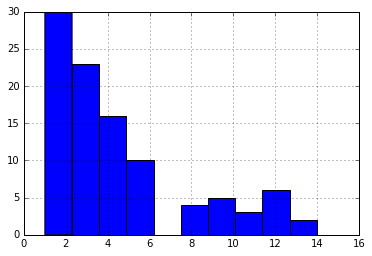

In [15]:
# plot rating per image distribution
image_count = classifications.subject_ids.value_counts()
image_count.hist()

In [16]:
#Merge Users rating
conctat_rating = [classifications[classifications.user_name == user][['ID','rating']].rename(columns={'rating': user})
                  for user in list_user]
# keep unique ID's
concats_unique = [conctat_rating[ii].ix[conctat_rating[ii].ix[:,0].drop_duplicates().index] 
                  for ii in range(len(conctat_rating))]
df_rating = reduce(lambda left,right: pd.merge(left,right,how='outer',on='ID'), concats_unique)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
df_rating.count()

ID                                    99
not-logged-in-6de6af62194409404f22    74
not-logged-in-3382ba2594cbaa5d6693    55
EcceruElme                            58
KazzaY                                46
Dennis21                              20
asko_oksa                             10
not-logged-in-afc55459e27e2403b971    20
Liisika                               20
simexp                                22
cyerby                                20
dtype: int64

In [18]:
df_rating.head()

,ID,not-logged-in-6de6af62194409404f22,not-logged-in-3382ba2594cbaa5d6693,EcceruElme,KazzaY,Dennis21,asko_oksa,not-logged-in-afc55459e27e2403b971,Liisika,simexp,cyerby
0,X2136051,Maybe,OK,Fail,OK,NaN,NaN,NaN,NaN,NaN,NaN
1,X3662296,Fail,NaN,Fail,OK,NaN,NaN,NaN,NaN,NaN,NaN
2,X3519022,Maybe,Maybe,NaN,OK,OK,NaN,Maybe,OK,Maybe,Maybe
3,X2409220,Maybe,NaN,Fail,NaN,OK,NaN,Maybe,OK,Fail,Maybe
4,X1647968,Maybe,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# remove duplicates
#df_rating = df_rating[~df_rating.ID.duplicated()]

In [20]:
stuff = np.array([[np.sum(row[1:-1].values=='Fail'),
                   np.sum(row[1:-1].values=='Maybe'),
                   np.sum(row[1:-1].values=='OK')] for ind, row in df_rating.iterrows()])

In [21]:
df_score = pd.DataFrame(index=df_rating.index,data=stuff, columns=['Fail', 'Maybe', 'OK'])

In [22]:
# Normalise table's row
nb_rating = df_score.sum(axis="columns")
df_norm = pd.DataFrame( index=df_rating.index,columns=['Fail', 'Maybe', 'OK'])
for status in df_score.columns.values:
    for image in df_score.index:
        df_norm[status][image] = df_score[status][image]/nb_rating[image]

In [23]:
df_score.head()

,Fail,Maybe,OK
0,1,1,2
1,2,0,1
2,0,4,3
3,2,2,2
4,0,1,1


In [24]:
df_norm.head()

,Fail,Maybe,OK
0,0.25,0.25,0.5
1,0.666667,0,0.333333
2,0,0.571429,0.428571
3,0.333333,0.333333,0.333333
4,0,0.5,0.5


## Histograms
Histograms of the frequency of the "OK", "Maybe" and "fail" rating across raters, for all images. If all raters agreed, we would only have 0% or 100% rating frequencies. 

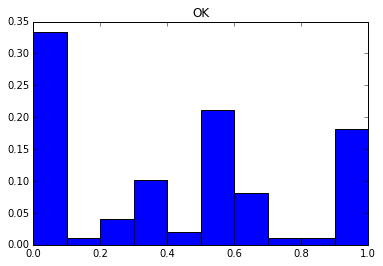

In [25]:
# Histogram of OK
hok , bins = np.histogram(df_norm.OK,bins=np.arange(0,1.1,0.1))
hok = hok.astype(np.float32) / hok.sum()
plt.bar(bins[:-1], hok , width=(bins[1]-bins[0]))
plt.title('OK')

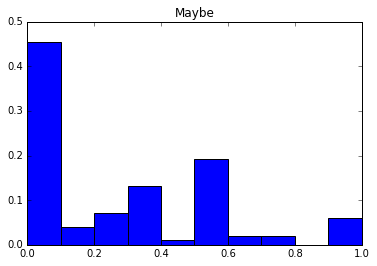

In [26]:
# Histogram of Maybe
hmaybe , bins = np.histogram(df_norm.Maybe,bins=np.arange(0,1.1,0.1))
hmaybe = hmaybe.astype(np.float32) / hmaybe.sum()
plt.bar(bins[:-1], hmaybe , width=(bins[1]-bins[0]))
plt.title('Maybe')

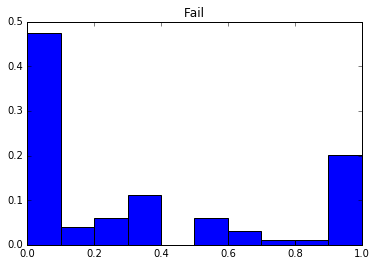

In [27]:
# Histogram of Fail
hfail , bins = np.histogram(df_norm.Fail,bins=np.arange(0,1.1,0.1))
hfail = hfail.astype(np.float32) / hfail.sum()
plt.bar(bins[:-1], hfail , width=(bins[1]-bins[0]))
plt.title('Fail')

## Kappa score

In [28]:
# filter user who completed rating for kappa
name_users_kappa = [ix for ix,x in user_count.iteritems() if x > 55]
name_users_kappa

['not-logged-in-6de6af62194409404f22',
 'not-logged-in-3382ba2594cbaa5d6693',
 'EcceruElme']

In [29]:
#select raters
df_kappa = df_rating[["ID"]+ name_users_kappa]
df_kappa.count()

ID                                    99
not-logged-in-6de6af62194409404f22    74
not-logged-in-3382ba2594cbaa5d6693    55
EcceruElme                            58
dtype: int64

In [30]:
# add matching column 
df_kappa.loc[:,"rating_match"] = df_kappa.iloc[:,1:].apply(lambda x: len(set(x)) == 1, axis=1)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
df_kappa.to_csv(os.path.join(path_root,'full_lunch_anat_V01/non_expert-project-classifications_sub-select.csv'))
df_kappa.head()

,ID,not-logged-in-6de6af62194409404f22,not-logged-in-3382ba2594cbaa5d6693,EcceruElme,rating_match
0,X2136051,Maybe,OK,Fail,False
1,X3662296,Fail,NaN,Fail,False
2,X3519022,Maybe,Maybe,NaN,False
3,X2409220,Maybe,NaN,Fail,False
4,X1647968,Maybe,OK,NaN,False


In [32]:
df_kappa.dropna(inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_kappa.count()

ID                                    25
not-logged-in-6de6af62194409404f22    25
not-logged-in-3382ba2594cbaa5d6693    25
EcceruElme                            25
rating_match                          25
dtype: int64

In [34]:
# Replace OK:1 , Maybe:2 and Fail:3
df_kappa.replace({'OK':1,'Maybe':2, 'Fail':3}, inplace=True)
df_kappa.head()

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3836: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


,ID,not-logged-in-6de6af62194409404f22,not-logged-in-3382ba2594cbaa5d6693,EcceruElme,rating_match
0,X2136051,2,1,3,False
7,X0026022,1,1,3,False
8,X8415034,3,3,3,True
9,X3809753,1,1,3,False
11,X0010061,3,3,3,True


In [35]:
# remove duplicates ID's
df_kappa = df_kappa[~df_kappa.ID.duplicated()]# remove duplicates ID's
df_kappa = df_kappa[~df_kappa.ID.duplicated()]
df_kappa.count()

ID                                    25
not-logged-in-6de6af62194409404f22    25
not-logged-in-3382ba2594cbaa5d6693    25
EcceruElme                            25
rating_match                          25
dtype: int64

In [36]:
# calculate the percentage of agreement
agreem_num = (df_kappa.rating_match.sum()/df_kappa.ID.count())*100
"The percentage of agreement is: {:.2f}".format(agreem_num)

'The percentage of agreement is: 32.00'

In [37]:
# Generate Kappa matrix rater by rater
kappa_store = np.zeros((len(name_users_kappa), len(name_users_kappa)))
for net_id in range(len(name_users_kappa)):
    rater_1 = name_users_kappa[net_id]
    for s_id in range(len(name_users_kappa)):
        rater_2 = name_users_kappa[s_id]
        kappa = metrics.cohen_kappa_score(df_kappa[[rater_1]],df_kappa[[rater_2]])
        # Save the kappa
        kappa_store[net_id, s_id] = kappa

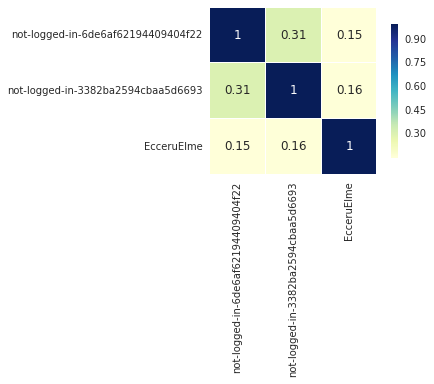

In [38]:
# Plot kappa matrix

kappa_out = pd.DataFrame(kappa_store, index=name_users_kappa, columns=name_users_kappa)
sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 3))
# Draw the map
sns.heatmap(kappa_out,vmax=1,cmap="YlGnBu",
            square=True,annot=True,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

In [39]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.stack.imgur.com/kYNd6.png" ,width=600, height=600)

## Plot tagging on images 

In [40]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt

In [41]:
#base_path = '/home/yassinebha/Drive/QC_zooniverse_2/brainhack2017/rating_images'

In [42]:
classifications.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,n_tagging,rating,ID,imgnm
3,18847132,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:18:52 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:18:52.065Z', 'u...","[{'value': 'Fail', 'task': 'T0', 'task_label':...","{'3865525': {'retired': {'id': 2557556, 'class...",3865525,4,Fail,X6206397,summary_X6206397_anat2template.gif
4,18847141,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:19:06 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:19:06.742Z', 'u...","[{'value': 'Maybe', 'task': 'T0', 'task_label'...","{'3865464': {'retired': {'id': 2557557, 'class...",3865464,5,Maybe,X2054998,summary_X2054998_anat2template.gif
5,18847204,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:20:57 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:20:57.808Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865361': {'retired': {'id': 2557564, 'class...",3865361,2,OK,X1552181,summary_X1552181_anat2template.gif
6,18847215,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:21:11 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:21:10.843Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865341': {'retired': {'id': 2557566, 'class...",3865341,2,OK,X0021015,summary_X0021015_anat2template.gif
8,18847231,simexp,1506317.0,d95fe014d954564fb20d,2335,Spot anatomical differences,12.13,2016-10-14 02:21:32 UTC,NaN,NaN,"{'finished_at': '2016-10-14T02:21:31.962Z', 'u...","[{'value': 'OK', 'task': 'T0', 'task_label': '...","{'3865413': {'retired': {'id': 2557569, 'class...",3865413,2,OK,X0027034,summary_X0027034_anat2template.gif


In [84]:
# output markings from 50 classifications
#Basile
clist=[]
for index, c in classifications.iterrows():
    if c['n_tagging'] > 0:
        for q in c.annotations[1]['value']:
            clist.append({'ID':c.ID, 'workflow_name':c.workflow_name,'user_name':c.user_name, 'rating':c.rating,'imgnm':c.imgnm, 
                          'x':q['x'], 'y':np.round(q['y']).astype(int), 'r':'2','n_tagging':c.n_tagging ,'frame':q['frame']})
    else:
        clist.append({'ID':c.ID, 'workflow_name':c.workflow_name, 'user_name':c.user_name,'rating':c.rating,'imgnm':c.imgnm, 
                          'x':float('nan'), 'y':float('nan'), 'r':float('nan'),'n_tagging':c.n_tagging ,'frame':'1'})

col_order=['ID','workflow_name','user_name','rating','x','y','r','n_tagging','imgnm','frame']
out = pd.DataFrame(clist)[col_order]

In [85]:
out.count()

ID               1148
workflow_name    1148
user_name        1148
rating           1148
x                1148
y                1148
r                1148
n_tagging        1148
imgnm            1148
frame            1148
dtype: int64

In [86]:
# out only selected rater
out_kappa = out.loc[out['user_name'].isin(name_users_kappa)]
# out only kappa rated images
out_kappa = out_kappa.loc[out_kappa['ID'].isin(df_kappa.ID)]
out_kappa.head()

,ID,workflow_name,user_name,rating,x,y,r,n_tagging,imgnm,frame
8,X0021020,Spot anatomical differences,not-logged-in-3382ba2594cbaa5d6693,Maybe,112.296875,340,2,5,summary_X0021020_anat2template.gif,0
9,X8415034,Spot anatomical differences,not-logged-in-3382ba2594cbaa5d6693,Fail,74.296875,25,2,4,summary_X8415034_anat2template.gif,0
10,X8415034,Spot anatomical differences,not-logged-in-3382ba2594cbaa5d6693,Fail,45.296875,114,2,4,summary_X8415034_anat2template.gif,0
11,X8415034,Spot anatomical differences,not-logged-in-3382ba2594cbaa5d6693,Fail,116.296875,187,2,4,summary_X8415034_anat2template.gif,0
12,X8415034,Spot anatomical differences,not-logged-in-3382ba2594cbaa5d6693,Fail,85.296875,182,2,4,summary_X8415034_anat2template.gif,0


In [87]:
ids_imgnm = np.reshape([out.ID.unique(),out.imgnm.unique()],(2,np.shape(out.ID.unique())[0]))

In [88]:
from shutil import copyfile, copy2
#base_path_src = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
base_path_src = os.path.join(path_root,'zooqc_report_cobre_03-Jul-2017/registration')
base_path_dest = os.path.join(path_root,'Beta2/rating_images')

In [89]:
# juste run once to collect images in specific folder
#from shutil import copyfile, copy2
#base_path_src = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
#base_path_src = os.path.join(path_root,'zooqc_report_cobre_03-Jul-2017/registration')
#base_path_dest = os.path.join(path_root,'Beta2/rating_images')
#for ii in np.sort(ids_imgnm.T[:,1])[:15]:#[15:]
    #print(ii)
    #copy2(os.path.join(base_path_src,ii),base_path_dest)

In [90]:
df_ids_imgnm = pd.DataFrame(np.sort(ids_imgnm.T, axis=0),columns=['ID', 'imgnm'])

In [91]:
df_ids_imgnm.count()

ID       76
imgnm    76
dtype: int64

In [128]:
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
def _cmap_from_image_path(img_path):
        img = Image.open(img_path)
        img = img.resize((256, img.height))
        colours = (img.getpixel((x, 0)) for x in range(256))
        colours = [(r/255, g/255, b/255, a/255) for (r, g, b, a) in colours]
        return colours,LinearSegmentedColormap.from_list('from_image', colours)

In [133]:
coll,a=_cmap_from_image_path('/media/yassine/data_disk/Drive/QC_zooniverse_2/full_lunch_anat_V01/default.png')
#invert color map
coll_r = matplotlib.colors.ListedColormap(coll[::-1])

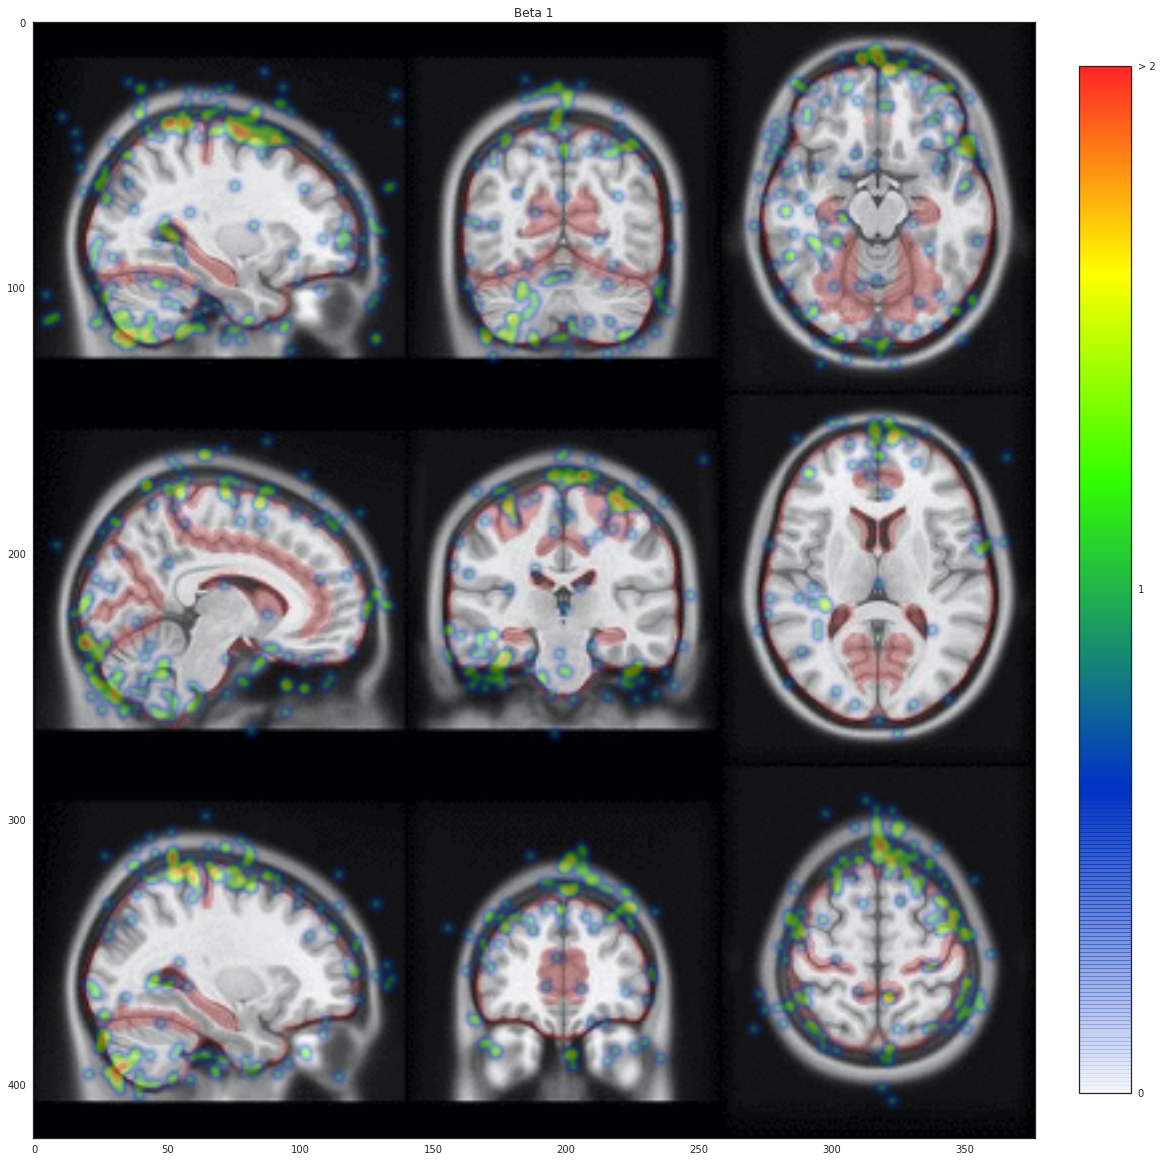

In [156]:
from heatmappy import Heatmapper
from PIL import Image
patches=list()
for ind, row in df_ids_imgnm.iterrows():
    out_tmp = out[out['ID'] == row.ID]
    patches.append([(row.x,row.y) for ind,row in out_tmp.iterrows()])
# plot heat map on the template
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
img = Image.open(os.path.join(path_root,'Beta1/template.png'))
ax.set_title('Beta 1')
patches = [x for x in sum(patches,[]) if str(x[0]) != 'nan'] 
heatmapper = Heatmapper(opacity=0.4,
                        point_diameter=8,
                        point_strength = 0.5,
                        colours=a)
heatmap = heatmapper.heatmap_on_img(patches, img)
im = ax.imshow(heatmap,cmap=coll_r)
cbar = fig.colorbar(im, orientation='vertical', ticks=[0, 125, 255],fraction=0.046, pad=0.04)
cbar.ax.set_yticklabels(['0', '1', '> 2'])
img.close()
heatmap.close()

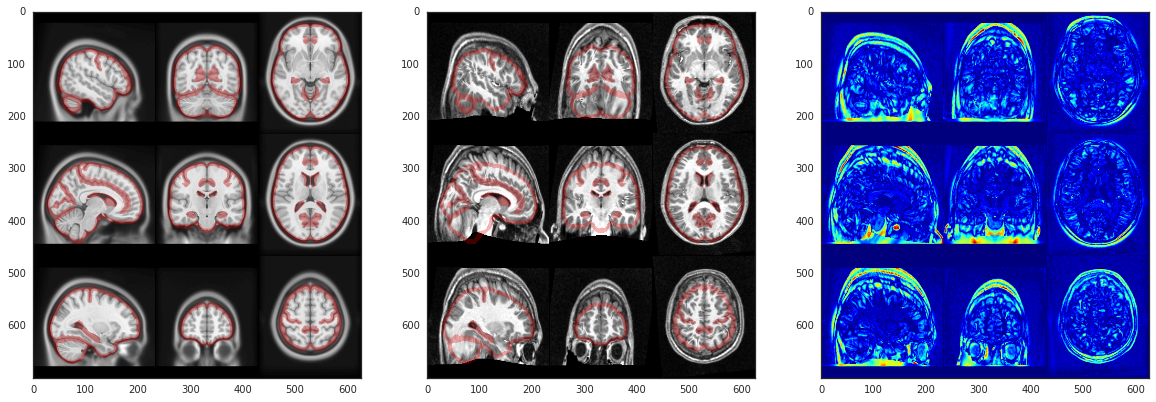

In [281]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img1 = mpimg.imread(os.path.join(path_root,'tutorial_v2/anat_fail/anat_template_stereotaxic.png'))
img2 = mpimg.imread(os.path.join(base_path_dest,'X_0021014_anat.png'))

# Calculate the absolute difference on each channel separately
error_r = np.fabs(np.subtract(img2[:,:,0], img1[:,:,0]))
error_g = np.fabs(np.subtract(img2[:,:,1], img1[:,:,1]))
error_b = np.fabs(np.subtract(img2[:,:,2], img1[:,:,2]))

# Calculate the maximum error for each pixel
lum_img = np.maximum(np.maximum(error_r, error_g), error_b)

# Uncomment the next line to turn the colors upside-down
#lum_img = np.negative(lum_img);

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(img1)
ax2 = fig.add_subplot(132)
ax2.imshow(img2)
ax3 = fig.add_subplot(133)
ax3.imshow(lum_img,cmap='jet')
# Choose a color palette
#ax3.set_cmap('Spectral') 
